# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, SpatialDropout2D
from tensorflow.keras.optimizers import Adam, SGD
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
import random

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/AIML/CNNProject/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/AIML/CNNProject/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images using OpenCV and matplotlib

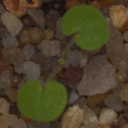

In [ ]:
image =cv2_imshow(images[5])

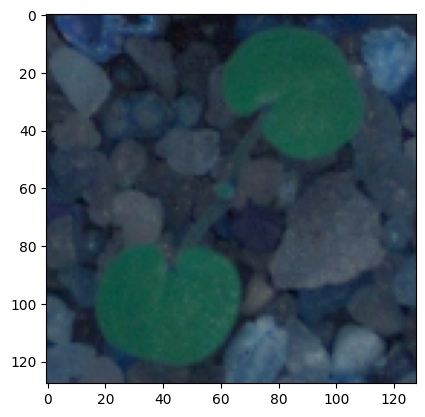

In [ ]:
plt.imshow(images[5])

**Observation**

*   We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
*   Now we will convert these BGR images to RGB images so we could interpret them easily.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
def plot_images(images,labels):
    num_classes=10                                                                  # Number of Classes
    categories=np.unique(labels)
    keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
    rows = 3                                                                        # Defining number of rows=3
    cols = 4                                                                        # Defining number of columns=4
    fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
            ax.imshow(images[random_index, :])                                      # Plotting the image
            ax.set_title(keys[random_index])
    plt.show()

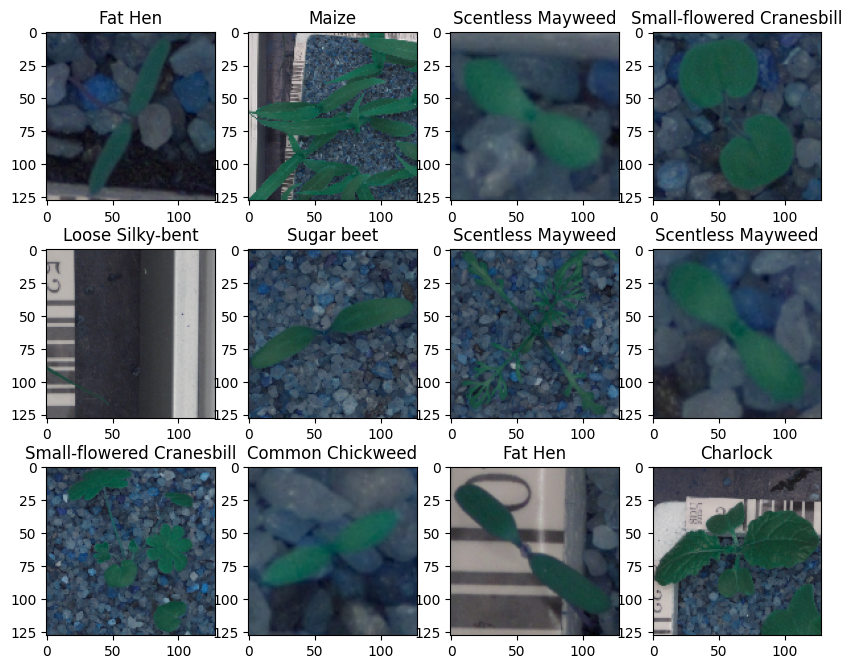

In [ ]:
plot_images(images,labels)

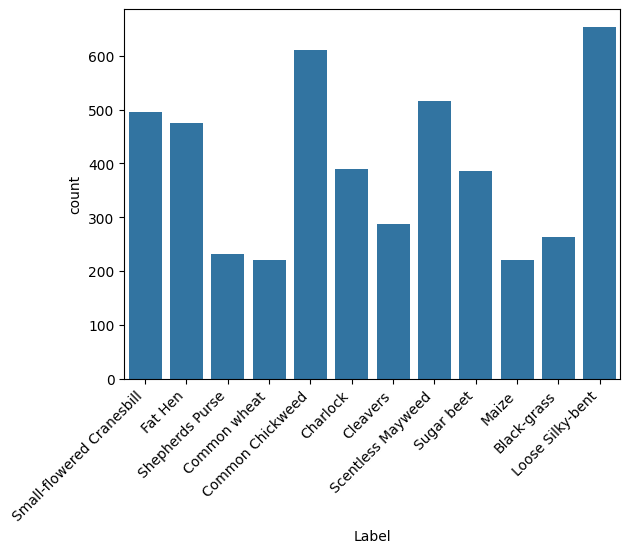

In [ ]:
#| label: fig-dist-plot
#| fig-cap: "Distribution of the target variable by species name"
#| fig-cap-location: margin
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')
plt.xticks(rotation=45, ha='right')
plt.show();

**Observation**
*   Some classes has high frequency than other like Loose Silky-bent, Common Chickweed
*   Some of the classes have a lower frequency than others, such as common wheat and shepherds purse.

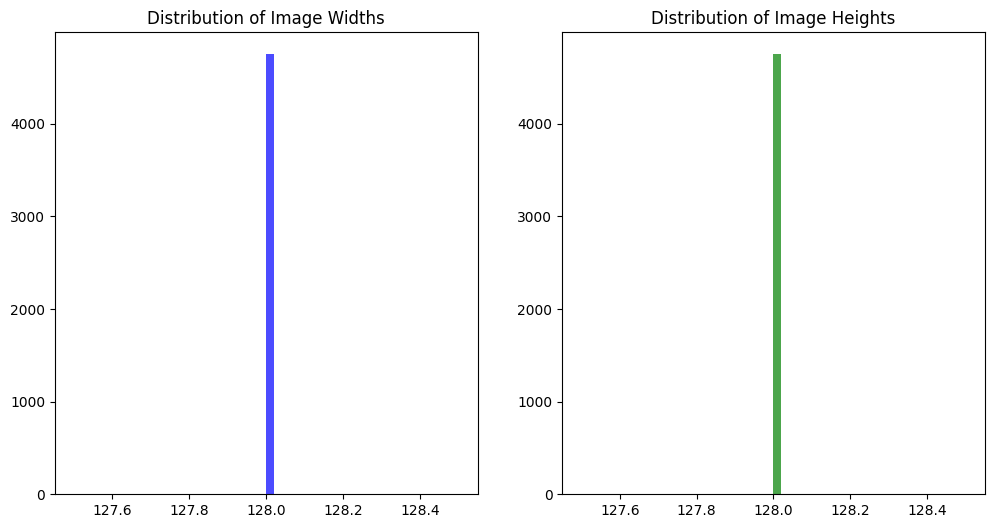

In [ ]:
#| label: fig-image-width-height
#| fig-cap: "Image width and height"
#| fig-cap-location: margin
# Extract image dimensions
img_widths, img_heights = [], []

for img in images:
    h, w, _ = img.shape
    img_widths.append(w)
    img_heights.append(h)

# Plot distribution of widths and heights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(img_widths, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Image Widths")
plt.subplot(1, 2, 2)
plt.hist(img_heights, bins=50, color='green', alpha=0.7)
plt.title("Distribution of Image Heights")
plt.show()

*All the images have the same width and height. There are no images with a different resolution.*

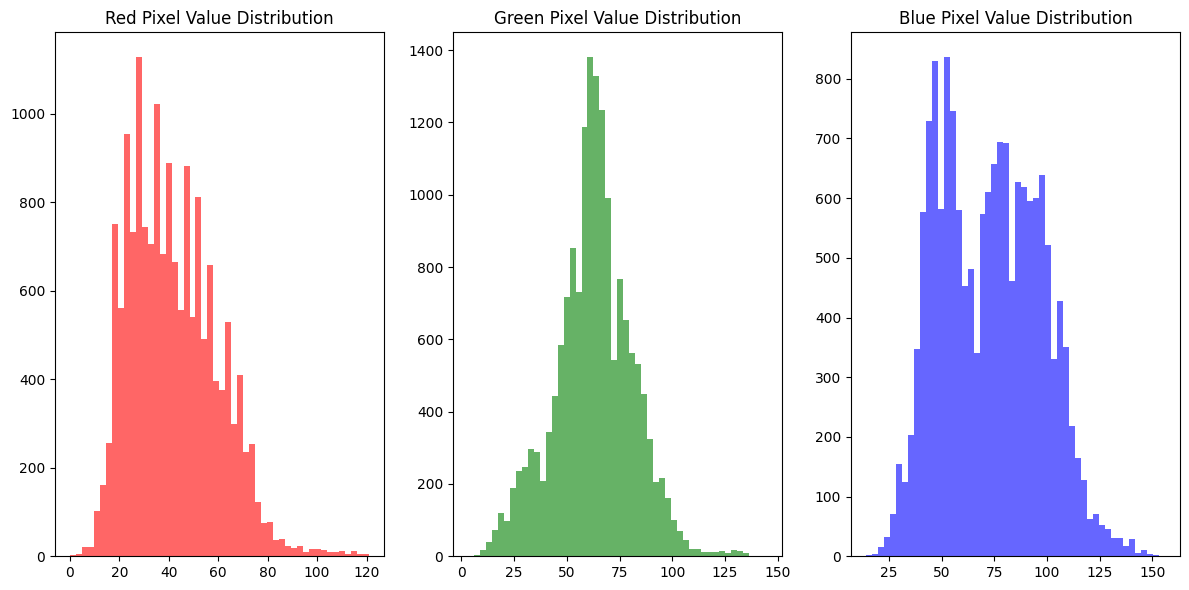

In [ ]:
#| code-summary: Choose a random image and plot pixel value distribution
#| label: fig-image-pixel-value-distribution
#| fig-cap: "Pixel value distribution"
#| fig-cap-location: margin

random_img = images[np.random.randint(0, len(images))]

plt.figure(figsize=(12, 6))
colors = ['Red', 'Green', 'Blue']
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    plt.hist(random_img[:, :, i].ravel(), bins=50, color=color.lower(), alpha=0.6)
    plt.title(f"{color} Pixel Value Distribution")
plt.tight_layout()
plt.show()

*Distributio seems to fine on all colors, doesn't require any color preprocessing*

In [ ]:
#| code-summary: Check for grayscale images
def is_grayscale(img):
    return np.all(img[:, :, 0] == img[:, :, 1]) and np.all(img[:, :, 1] == img[:, :, 2])


gray_images = [img for img in images if is_grayscale(img)]
print(f"Total grayscale images: {len(gray_images)}")

Total grayscale images: 0


*We don't have any Grey color images, all are related RGB*

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [ ]:
categ = ['Charlock','Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet', 'Black-grass', 'Cleavers']


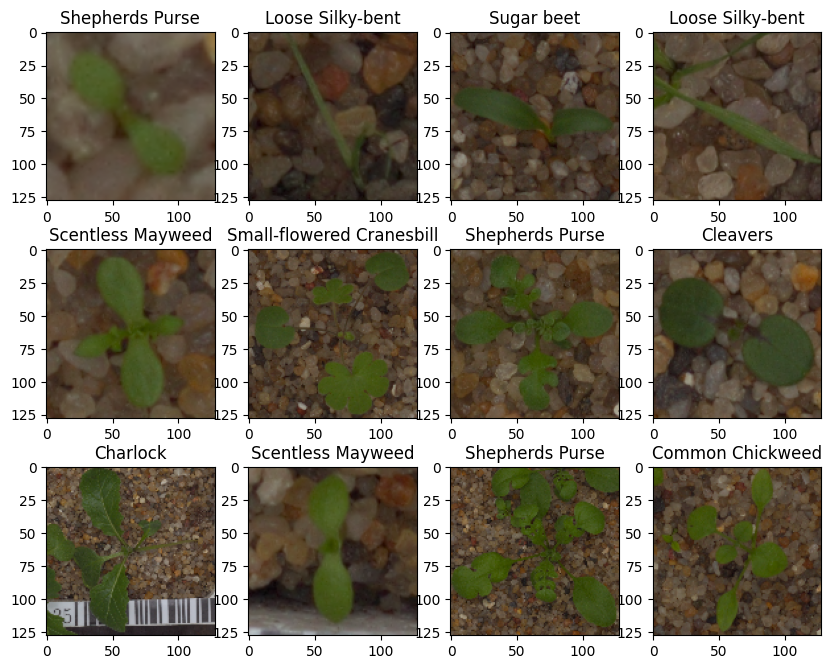

In [ ]:
plot_images(images, labels)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

**Decrease images size**

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
    images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Visualizing images using Gaussian Blur**

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

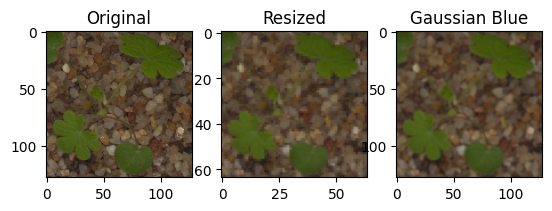

In [ ]:
count = 3
Titles = ["Original", "Resized", "Gaussian Blue"]
image = [images[52], images_decreased[52],images_gb[52]]
for i in range(count):
    plt.subplot(1, count, i + 1)
    plt.title(Titles[i])
    plt.imshow(image[i])

plt.show();

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
#| code-summary: Split into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    np.array(images_decreased), labels, test_size=0.1, random_state=42,
    stratify=labels
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp
)

In [ ]:
#| Check the shape of the splits
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier, so now we will be using a new
# encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

In [ ]:
# Check the shape of the encoded labels
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Data Normalization

In [ ]:
# Normalize the data to a range of 0-1
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

## Model Building

In [ ]:
# Clearing backend
backend.clear_session();

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

**Build CNN base model - Model1**

In [ ]:
# Building a sequential model - model 1
# Intializing a sequential model
model1 = Sequential()

# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
model1.add(MaxPooling2D((2, 2), padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

model1.add(Flatten())

model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(12, activation='softmax'))

opt = Adam()
# Complete the code to Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the code to generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

**Model 1- Fitting the model**

In [ ]:
#| code-summary: Fit the model on training data for 100 epochs
#| output: false

history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 11s - loss: 2.4519 - accuracy: 0.1133 - val_loss: 2.4348 - val_accuracy: 0.1285 - 11s/epoch - 91ms/step
Epoch 2/30
121/121 - 10s - loss: 2.3853 - accuracy: 0.1801 - val_loss: 2.1558 - val_accuracy: 0.3388 - 10s/epoch - 82ms/step
Epoch 3/30
121/121 - 10s - loss: 2.0930 - accuracy: 0.2976 - val_loss: 1.8276 - val_accuracy: 0.3902 - 10s/epoch - 83ms/step
Epoch 4/30
121/121 - 10s - loss: 1.8926 - accuracy: 0.3364 - val_loss: 1.6986 - val_accuracy: 0.4556 - 10s/epoch - 82ms/step
Epoch 5/30
121/121 - 10s - loss: 1.7658 - accuracy: 0.3699 - val_loss: 1.5507 - val_accuracy: 0.4696 - 10s/epoch - 82ms/step
Epoch 6/30
121/121 - 10s - loss: 1.6704 - accuracy: 0.4014 - val_loss: 1.5089 - val_accuracy: 0.5210 - 10s/epoch - 82ms/step
Epoch 7/30
121/121 - 10s - loss: 1.6354 - accuracy: 0.4203 - val_loss: 1.3549 - val_accuracy: 0.5537 - 10s/epoch - 82ms/step
Epoch 8/30
121/121 - 10s - loss: 1.5589 - accuracy: 0.4388 - val_loss: 1.2709 - val_accuracy: 0.5701 - 10s/epoch - 83ms/step


**Model Evaluation**

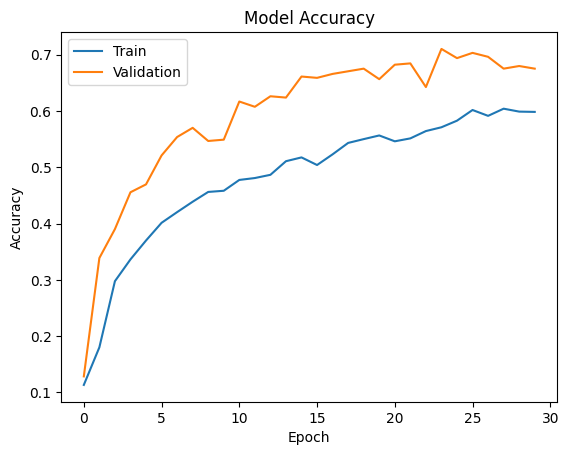

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

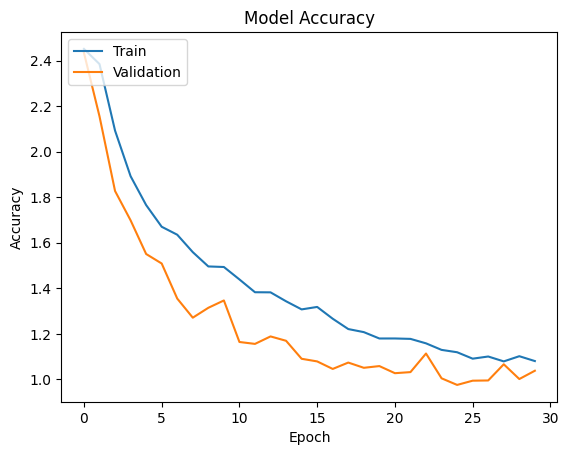

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluating the model on test data**

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.0562 - accuracy: 0.6800 - 395ms/epoch - 26ms/step


**Observations**:
*   We can see from the above plot that the training accuracy & loss of the model was good but the validation accuracy was not good.
*   The model seems to overfit on the data
*   Test validation results are not good as well





**Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

15/15 [==============================] - 0s 24ms/step


In [ ]:
y_pred

array([[1.2214493e-25, 3.2164799e-19, 6.3939890e-23, ..., 4.9600884e-04,
        3.4218901e-18, 2.3330878e-05],
       [2.6042452e-10, 1.6777571e-01, 1.2327177e-01, ..., 8.2907885e-02,
        5.8149773e-01, 1.6622055e-02],
       [5.0141258e-10, 4.1737627e-02, 4.0397525e-02, ..., 3.1151064e-02,
        7.9407150e-01, 3.1863850e-02],
       ...,
       [2.4079546e-01, 8.7701064e-09, 2.1203674e-05, ..., 1.0423040e-09,
        8.7026782e-11, 2.8303788e-05],
       [3.2235092e-10, 8.9085315e-06, 8.0322578e-05, ..., 1.1056216e-02,
        1.3511676e-07, 7.3458109e-04],
       [7.9484502e-16, 2.1547264e-04, 2.1882065e-06, ..., 4.1790587e-01,
        2.7787946e-03, 1.7592698e-01]], dtype=float32)

**Plotting the Confusion Matrix**

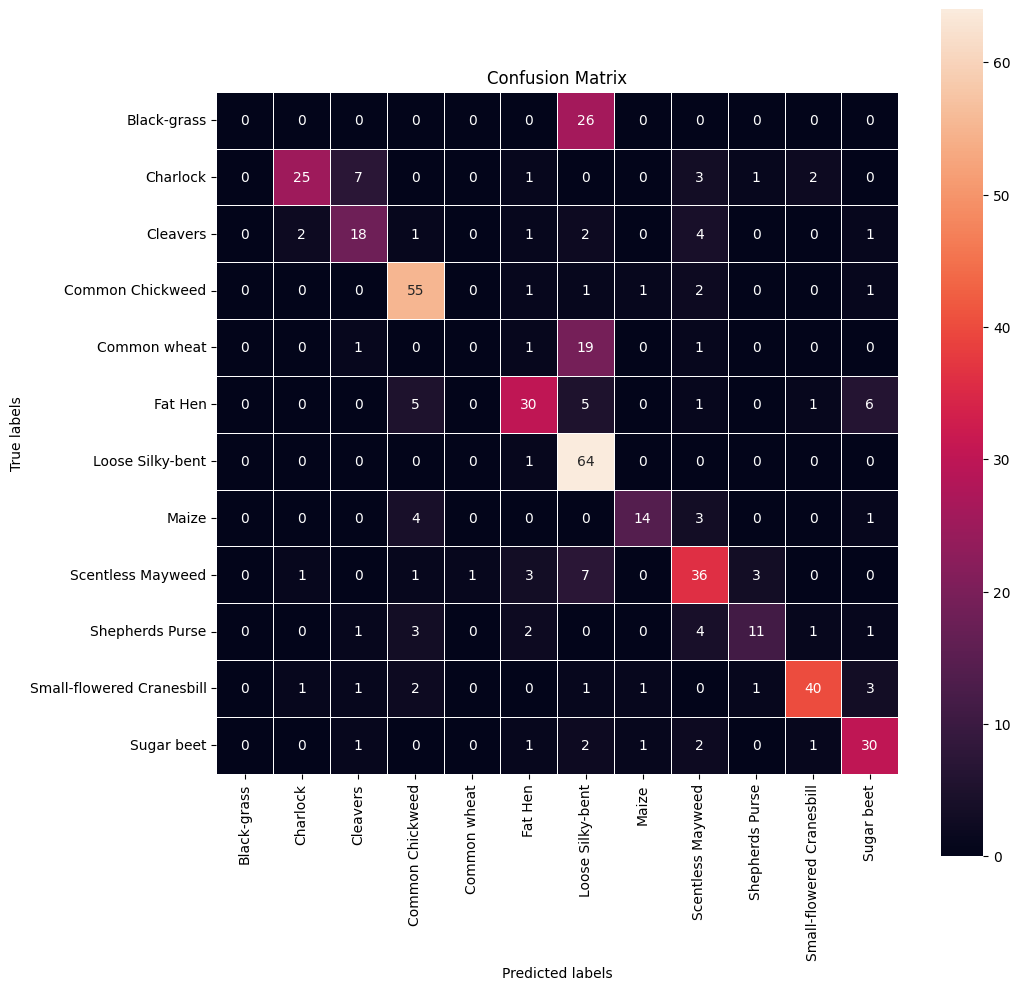

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=0)
plt.show()

In [ ]:
# Printing the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.86      0.64      0.74        39
           2       0.62      0.62      0.62        29
           3       0.77      0.90      0.83        61
           4       0.00      0.00      0.00        22
           5       0.73      0.62      0.67        48
           6       0.50      0.98      0.67        65
           7       0.82      0.64      0.72        22
           8       0.64      0.69      0.67        52
           9       0.69      0.48      0.56        23
          10       0.89      0.80      0.84        50
          11       0.70      0.79      0.74        38

    accuracy                           0.68       475
   macro avg       0.60      0.60      0.59       475
weighted avg       0.64      0.68      0.65       475



**Observations**

*   We observered that lot of classes are not predicted corretly
*   Couple of classes are well classifiled like Loose-silly bent, Common chickweek

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

### **Model 2 - with Data Aug**

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Creating a datagen augmentation object
train_datagen = ImageDataGenerator(
    rotation_range=45,
    shear_range=0.15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Intializing a sequential model - model 2
model2 = Sequential()

# Input_shape denotes input image dimension images
model2.add(
    Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal', input_shape=(64, 64, 3))
)
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Dropout(0.3))

model2.add(Conv2D(256, (5, 5), activation='relu', padding="same", kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Conv2D(256, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Dropout(0.4))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(SpatialDropout2D(0.3))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

model2.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(12, activation='softmax'))

opt = Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                        

In [ ]:
#| Fit and save the model
# Epochs
epochs = 120
# Batch size
batch_size = 32

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    callbacks=[learning_rate_reduction, early_stopping],
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/120
120/120 [==============================] - 60s 480ms/step - loss: 4.4614 - accuracy: 0.1900 - val_loss: 5.0464 - val_accuracy: 0.0491 - lr: 0.0010
Epoch 2/120
120/120 [==============================] - 57s 476ms/step - loss: 3.3046 - accuracy: 0.3345 - val_loss: 4.2556 - val_accuracy: 0.1706 - lr: 0.0010
Epoch 3/120
120/120 [==============================] - 57s 472ms/step - loss: 2.6201 - accuracy: 0.4218 - val_loss: 3.0163 - val_accuracy: 0.3271 - lr: 0.0010
Epoch 4/120
120/120 [==============================] - 57s 473ms/step - loss: 2.1809 - accuracy: 0.5004 - val_loss: 1.8325 - val_accuracy: 0.5864 - lr: 0.0010
Epoch 5/120
120/120 [==============================] - 57s 475ms/step - loss: 1.9652 - accuracy: 0.5263 - val_loss: 1.8310 - val_accuracy: 0.5794 - lr: 0.0010
Epoch 6/120
120/120 [==============================] - 57s 476ms/step - loss: 1.7821 - accuracy: 0.5817 - val_loss: 1.4973 - val_accuracy: 0.6869 - lr: 0.0010
Epoch 7/120
120/120 [=========================

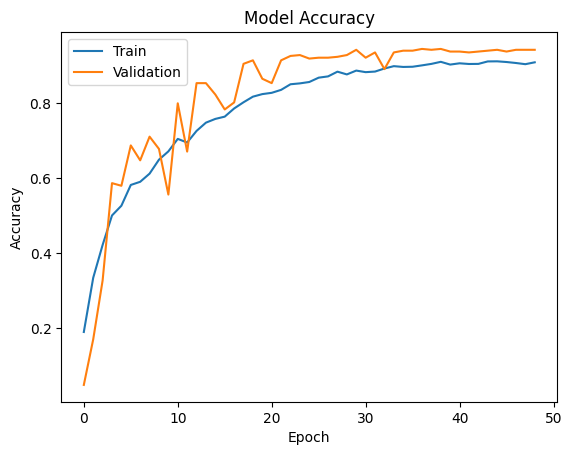

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

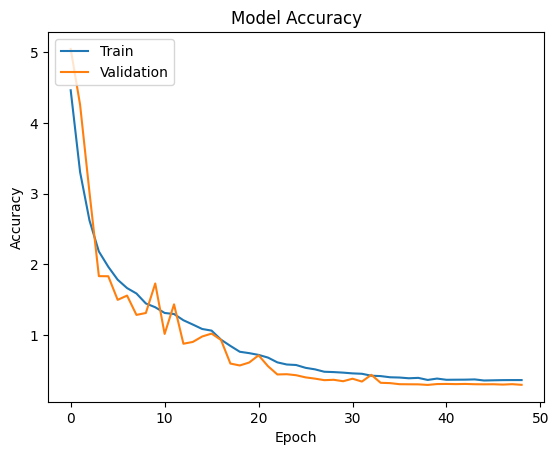

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.3386 - accuracy: 0.9053 - 1s/epoch - 77ms/step


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 1s 71ms/step


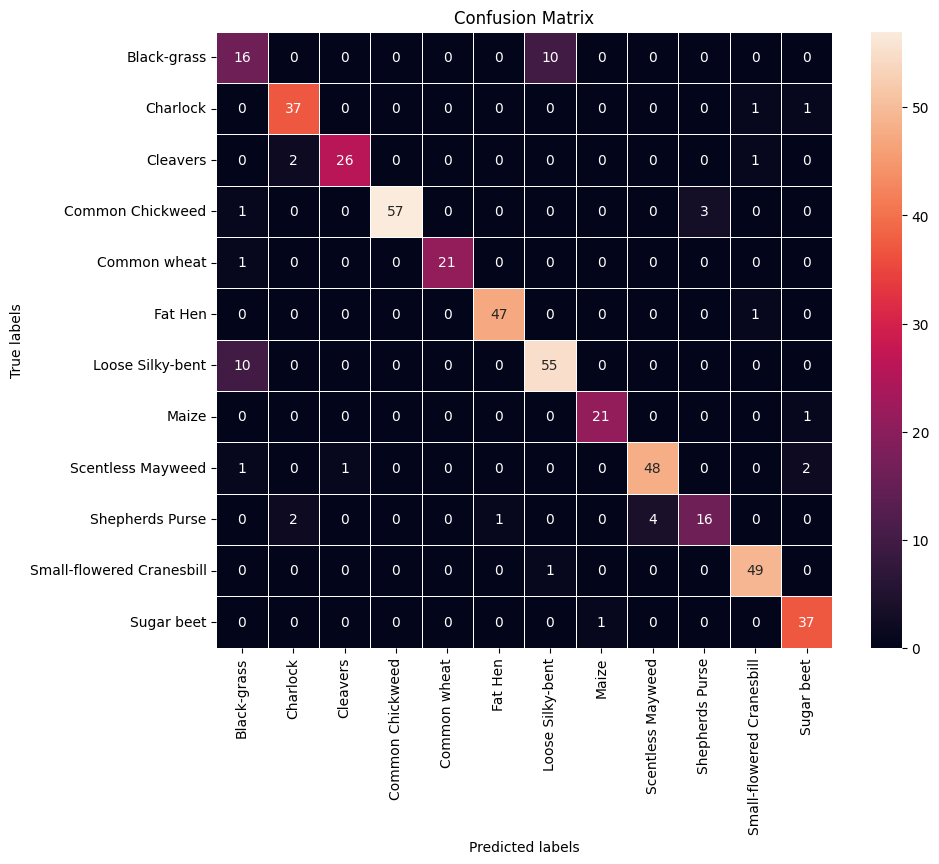

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=0)
plt.show()

**Observations**
*   Validation Accuracy ~ 90%; Test accouracy - 90%
*   Compare previous model, this has given good results
*   Model has wrong prediction - 'Black-grass', 'Loose-silly bent'

In [ ]:
# Printing the classification report
cr2 = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr2)

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        26
           1       0.90      0.95      0.92        39
           2       0.96      0.90      0.93        29
           3       1.00      0.93      0.97        61
           4       1.00      0.95      0.98        22
           5       0.98      0.98      0.98        48
           6       0.83      0.85      0.84        65
           7       0.95      0.95      0.95        22
           8       0.92      0.92      0.92        52
           9       0.84      0.70      0.76        23
          10       0.94      0.98      0.96        50
          11       0.90      0.97      0.94        38

    accuracy                           0.91       475
   macro avg       0.90      0.89      0.89       475
weighted avg       0.91      0.91      0.91       475



**Observations**
*   Recall is  low for Class 1
*   Precision is below ~80% for Class 1, 2 & 6
*   We are seeing similar behaviour in Confusion Matrix
*   Model has predicated for other classes; F1 scope is good (> 85%) for most of the classes
*   Accurary is ovarall good in this model
*   We don't have any overfitting or underfitting in this model
*   Loss is getting decreased in this model, training and validation loss are near close values

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

## Comparing Model 1 & Model 2

## Model 1 ##

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.86      0.64      0.74        39
           2       0.62      0.62      0.62        29
           3       0.77      0.90      0.83        61
           4       0.00      0.00      0.00        22
           5       0.73      0.62      0.67        48
           6       0.50      0.98      0.67        65
           7       0.82      0.64      0.72        22
           8       0.64      0.69      0.67        52
           9       0.69      0.48      0.56        23
          10       0.89      0.80      0.84        50
          11       0.70      0.79      0.74        38

    accuracy                           0.68       475
   macro avg       0.60      0.60      0.59       475
weighted avg       0.64      0.68      0.65       475



## Model 2 ##

In [ ]:
print(cr2)

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        26
           1       0.90      0.95      0.92        39
           2       0.96      0.90      0.93        29
           3       1.00      0.93      0.97        61
           4       1.00      0.95      0.98        22
           5       0.98      0.98      0.98        48
           6       0.83      0.85      0.84        65
           7       0.95      0.95      0.95        22
           8       0.92      0.92      0.92        52
           9       0.84      0.70      0.76        23
          10       0.94      0.98      0.96        50
          11       0.90      0.97      0.94        38

    accuracy                           0.91       475
   macro avg       0.90      0.89      0.89       475
weighted avg       0.91      0.91      0.91       475



### Visualizing the prediction for x_test[7], x_test[25], x_test[30], x_test[43], x_test[57]

1/1 [==============================] - 0s 32ms/step
Model predicted category for X_test 7 is:  [6]
Actual Category for X_test 7 is:  6
Actual Category Name for X_test 7 is:  Scentless Mayweed


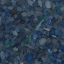

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 32ms/step
Model predicted category for X_test 25 is:  [7]
Actual Category for X_test 25 is:  7
Actual Category Name for X_test 25 is:  Shepherds Purse


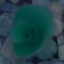

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 31ms/step
Model predicted category for X_test 30 is:  [9]
Actual Category for X_test 30 is:  9
Actual Category Name for X_test 30 is:  Sugar beet


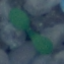

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 34ms/step
Model predicted category for X_test 43 is:  [10]
Actual Category for X_test 43 is:  10
Actual Category Name for X_test 43 is:  Black-grass


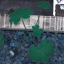

--------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 32ms/step
Model predicted category for X_test 57 is:  [1]
Actual Category for X_test 57 is:  1
Actual Category Name for X_test 57 is:  Common Chickweed


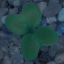

--------------------------------------------------------------------------------------------------


In [ ]:
pred_7 = np.argmax(model2.predict(np.expand_dims(X_test_normalized[7],axis=0)),axis=1)
actual_7 = np.argmax(y_test_encoded[7])
print("Model predicted category for X_test 7 is: ", pred_7)
print("Actual Category for X_test 7 is: ",actual_7 )
print("Actual Category Name for X_test 7 is: ",categ[actual_7] )
cv2_imshow(X_test_normalized[7]*255)
print("--------------------------------------------------------------------------------------------------")
pred_25 = np.argmax(model2.predict(np.expand_dims(X_test_normalized[25],axis=0)),axis=1)
actual_25 = np.argmax(y_test_encoded[25])
print("Model predicted category for X_test 25 is: ", pred_25)
print("Actual Category for X_test 25 is: ",actual_25 )
print("Actual Category Name for X_test 25 is: ",categ[actual_25] )
cv2_imshow(X_test_normalized[25]*255)
print("--------------------------------------------------------------------------------------------------")
pred_30 = np.argmax(model2.predict(np.expand_dims(X_test_normalized[30],axis=0)),axis=1)
actual_30 = np.argmax(y_test_encoded[30])
print("Model predicted category for X_test 30 is: ", pred_30)
print("Actual Category for X_test 30 is: ",actual_30 )
print("Actual Category Name for X_test 30 is: ",categ[actual_30] )
cv2_imshow(X_test_normalized[30]*255)
print("--------------------------------------------------------------------------------------------------")
pred_43 = np.argmax(model2.predict(np.expand_dims(X_test_normalized[43],axis=0)),axis=1)
actual_43 = np.argmax(y_test_encoded[43])
print("Model predicted category for X_test 43 is: ", pred_43)
print("Actual Category for X_test 43 is: ",actual_43 )
print("Actual Category Name for X_test 43 is: ",categ[actual_43] )
cv2_imshow(X_test_normalized[43]*255)
print("--------------------------------------------------------------------------------------------------")
pred_57 = np.argmax(model2.predict(np.expand_dims(X_test_normalized[57],axis=0)),axis=1)
actual_57 = np.argmax(y_test_encoded[57])
print("Model predicted category for X_test 57 is: ", pred_57)
print("Actual Category for X_test 57 is: ",actual_57 )
print("Actual Category Name for X_test 57 is: ",categ[actual_57] )
cv2_imshow(X_test_normalized[57]*255)
print("--------------------------------------------------------------------------------------------------")

**Conclusion**
*   We have built a CNN model to predict the plant class, which have provided correct results. (Increasing number of epochs and/or adding layers to a model can even increase the performance)
*   
CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification

## Actionable Insights and Business Recommendations

*   With an accuracy of ~ 85% on test data, the model is able to significantly reduce the time and effort required to identify these plants. These will help to free up human resources for other productiviy
*   Having additional data, Model can fine tuned to provide better prediction
*   This model could be integrated with automatic weeding systems, allowing weeds to be targeted over crops, reduce the amount of pesticides used overall, and lead to more eco-friendly farming.
*   Develop a mobile application for farmers could allow them to quick identify an unknown plant from a photograph, allowing them to make decisions immediately.

_____